## Scaling Upwelling and Seicheing in the Strait of Georgia

In [67]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [71]:
# Define constants
g = 9.81
rho_0 = 1e3
H = 200
L = 1e5
k = 1
rho_air = 1.2
C_d = 1e-3
U_10 = 10

In [110]:
# Inputs
h_1, Delta_rho = np.meshgrid(np.arange(.1, 20.1, .1), np.arange(.1, 20.1, .1))

In [111]:
# Lower layer thickness
h_2 = H - h_1

# Reduced gravity
g_prime = g * Delta_rho / rho_0

# Friction velocity
u_star2 = C_d * (rho_air / rho_0) * U_10**2

# Wedderburn number
W = g_prime * h_1**2 / (u_star2 * L)

# Isopycnal Displacement
Zeta_a = k * h_1 / W

T = 2 * L / np.sqrt(g_prime * (h_1 * h_2) / H) / 86400

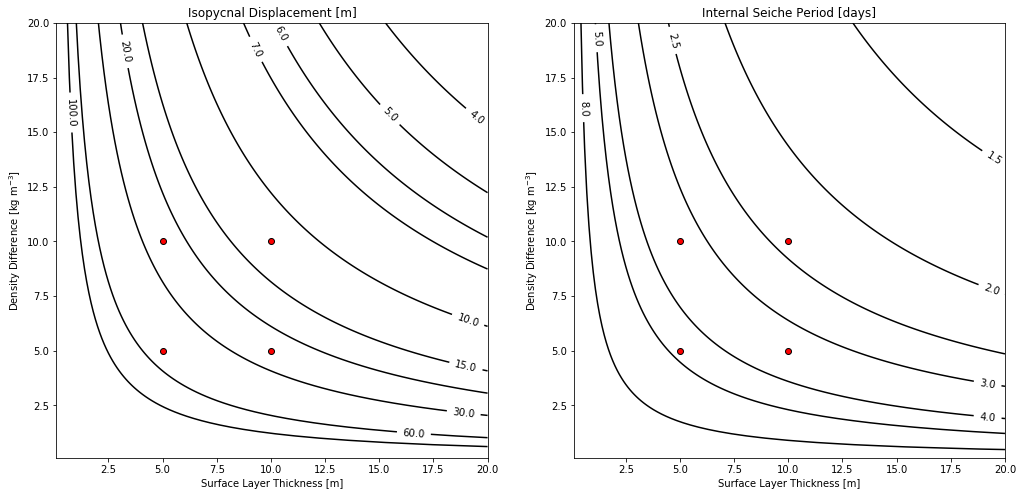

In [112]:
# Plot Results
fig, ax = plt.subplots(1, 2, figsize=(17, 8))

# Isopycnal Displacement
C1 = ax[0].contour(h_1, Delta_rho, Zeta_a, levels=[1, 2, 3, 4, 5, 6, 7, 10, 15, 20, 30, 60, 100], colors='k')
ax[0].plot([5, 10, 10, 5], [5, 5, 10, 10], 'ko', mfc='r')
plt.clabel(C1, inline=True, fmt='%.1f', fontsize=10)
ax[0].set_xlabel('Surface Layer Thickness [m]')
ax[0].set_ylabel('Density Difference [kg m$^{-3}$]')
ax[0].set_title('Isopycnal Displacement [m]')

# Internal Seiche Period
C2 = ax[1].contour(h_1, Delta_rho, T, levels=[1.5, 2, 2.5, 3, 4, 5, 8], colors='k')
ax[1].plot([5, 10, 10, 5], [5, 5, 10, 10], 'ko', mfc='r')
plt.clabel(C2, inline=True, fmt='%.1f', fontsize=10)
ax[1].set_xlabel('Surface Layer Thickness [m]')
ax[1].set_ylabel('Density Difference [kg m$^{-3}$]')
ax[1].set_title('Internal Seiche Period [days]')

plt.show()